## Amaan Ul Haq Siddiqui BDA-06

### TASK-A

In [214]:
import pandas as pdas
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb

In [215]:
df = pdas.read_csv('./ds/DataSet01.csv')

In [216]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [217]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [218]:
df['First Name'] = df['First Name'].fillna('Unknown')
df['Team'] = df['Team'].fillna('Unknown')
df['Gender'] = df['Gender'].fillna('Unknown')
df['Senior Management'] = df['Senior Management'].fillna(False)

C:\Users\Amaan Ul Haq\AppData\Local\Temp\ipykernel_5424\3574161014.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Senior Management'] = df['Senior Management'].fillna(False)


In [219]:
df.isnull().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [220]:
sb.set(style="whitegrid")

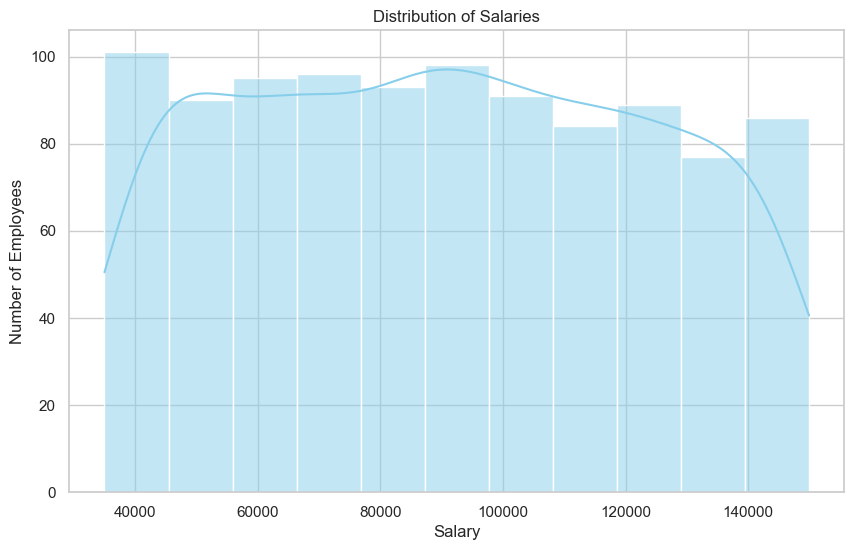

In [221]:
pt.figure(figsize=(10, 6))
sb.histplot(df['Salary'], kde=True, color='skyblue')
pt.title('Distribution of Salaries')
pt.xlabel('Salary')
pt.ylabel('Number of Employees')
pt.show()

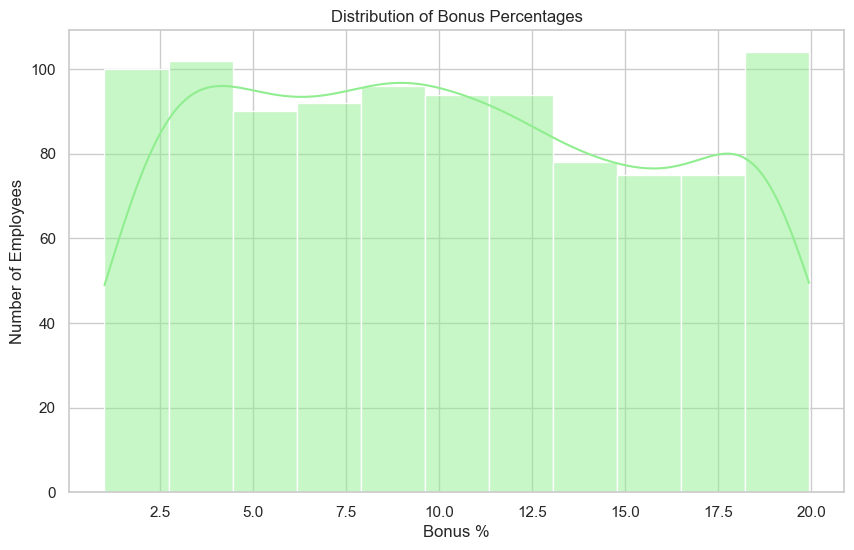

In [222]:
pt.figure(figsize=(10, 6))
sb.histplot(df['Bonus %'], kde=True, color='lightgreen')
pt.title('Distribution of Bonus Percentages')
pt.xlabel('Bonus %')
pt.ylabel('Number of Employees')
pt.show()

C:\Users\Amaan Ul Haq\AppData\Local\Temp\ipykernel_5424\54123857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(y='Team', data=df, palette='coolwarm', order=df['Team'].value_counts().index)


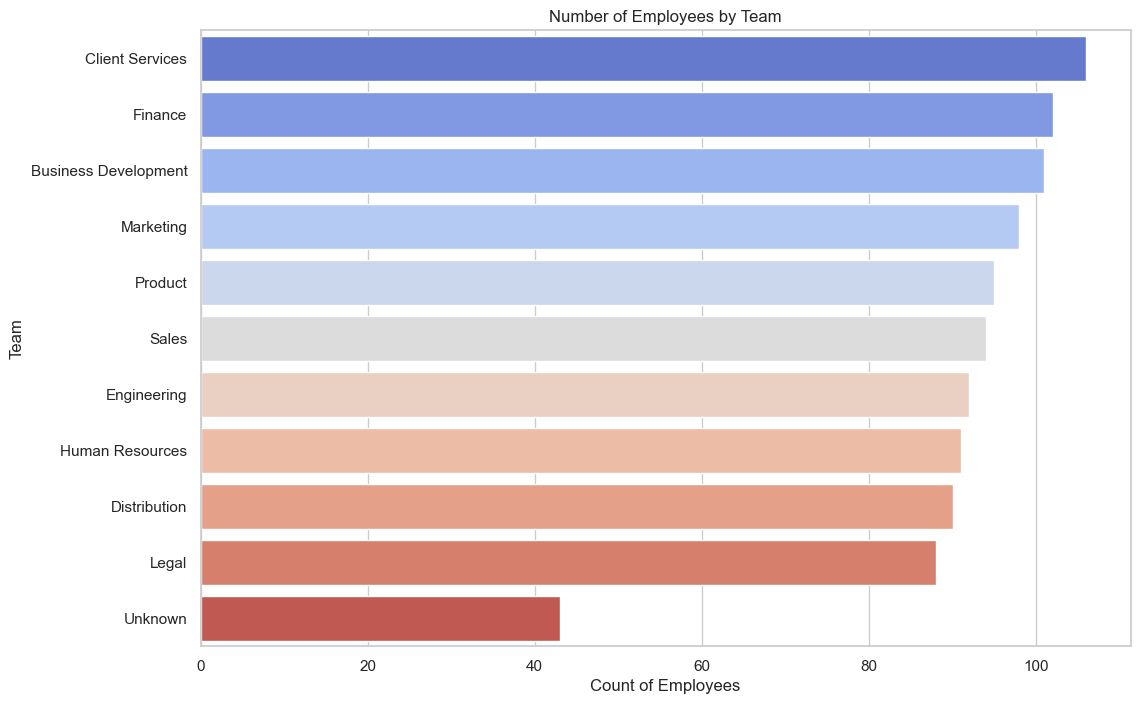

In [223]:
pt.figure(figsize=(12, 8))
sb.countplot(y='Team', data=df, palette='coolwarm', order=df['Team'].value_counts().index)
pt.title('Number of Employees by Team')
pt.xlabel('Count of Employees')
pt.ylabel('Team')
pt.show()

In [224]:
most_highly_paid = df.loc[df['Salary'].idxmax(), 'First Name']
most_highly_paid

'Katherine'

In [225]:
marketing_count = df[df['Team'] == 'Marketing'].shape[0]
marketing_count

98

In [226]:
marketing_high_earners = df[(df['Team'] == 'Marketing') & (df['Salary'] > 90000)].shape[0]
marketing_high_earners

48

In [227]:
average_salary_per_department = df.groupby('Team')['Salary'].mean()
average_salary_per_department

Team
Business Development    91866.316832
Client Services         88224.424528
Distribution            88500.466667
Engineering             94269.195652
Finance                 92219.480392
Human Resources         90944.527473
Legal                   89303.613636
Marketing               90435.591837
Product                 88665.505263
Sales                   92173.436170
Unknown                 90763.139535
Name: Salary, dtype: float64

In [228]:
employees_per_department = df['Team'].value_counts()
employees_per_department

Team
Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Unknown                  43
Name: count, dtype: int64

In [229]:
df['Bonus Amount'] = df['Salary'] * df['Bonus %'] / 100
df[['First Name', 'Bonus Amount']].head()

,First Name,Bonus Amount
0,Douglas,6758.04060
1,Thomas,2582.60610
2,Maria,15485.36220
3,Jerry,12955.04700
4,Larry,1402.94556
